#Importing Libraries

In [ ]:
from pylab import *
import pandas as pd
import seaborn as sns

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/zomato.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.count()

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

## Data preprocessing

### Handling Null values

In [ ]:
100 - (df.count()/df.shape[0] * 100)                      #null value percentage

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [ ]:
# if the null values' percentage is less than 5, they can be ignored.
#if the null values' percentage is greater than 10, they should be discarded.
df.drop(['rate','dish_liked'],axis="columns",inplace = True)

In [ ]:
df.shape

(51717, 15)

## Dropping Duplicate columns

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape                                       #No duplicates in the dataset

(51717, 15)

## Dropping unnecessary columns

In [ ]:
#url, phone and address are not required for the analysis. So, they can be discarded.
df.drop(['url','phone','address','menu_item'],axis="columns",inplace=True)

In [ ]:
df.shape

(51717, 11)

## Converting categorical data into Numerical data

In [ ]:
dummies = pd.get_dummies(df['online_order'])
print(dummies)

       No  Yes
0       0    1
1       0    1
2       0    1
3       1    0
4       1    0
...    ..  ...
51712   1    0
51713   1    0
51714   1    0
51715   1    0
51716   1    0

[51717 rows x 2 columns]


In [ ]:
df2 = pd.concat([df,dummies],axis=1)

In [ ]:
#rename column 'yes' to 'online_order'
df2.rename(columns={'Yes':'Online_order'},inplace=True)

In [ ]:
df2.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),No,Online_order
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,0,1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,0,1
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,0,1
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,1,0
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,1,0


In [ ]:
#drop 'online_order' consisting categorical data
df2.drop(['online_order'],axis="columns",inplace=True)

In [ ]:
#drop 'no'column as well
df2.drop(['No'],axis="columns",inplace=True)

In [ ]:
df2.shape

(51717, 11)

In [ ]:
df2.head()

,name,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Online_order
0,Jalsa,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,1
1,Spice Elephant,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,1
2,San Churro Cafe,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,1
3,Addhuri Udupi Bhojana,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,0
4,Grand Village,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,0


In [ ]:
dummies = pd.get_dummies(df['book_table'])
print(dummies)

       No  Yes
0       0    1
1       1    0
2       1    0
3       1    0
4       1    0
...    ..  ...
51712   1    0
51713   1    0
51714   1    0
51715   0    1
51716   1    0

[51717 rows x 2 columns]


In [ ]:
df3 = pd.concat([df2,dummies],axis=1)
df3.rename(columns={'Yes':'Book_table'},inplace=True)

In [ ]:
df3.head()

,name,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Online_order,No,Book_table
0,Jalsa,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,1,0,1
1,Spice Elephant,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,1,1,0
2,San Churro Cafe,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,1,1,0
3,Addhuri Udupi Bhojana,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,0,1,0
4,Grand Village,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,0,1,0


In [ ]:
df3.drop(['book_table','No'],axis="columns",inplace=True)

In [ ]:
df3.head()

,name,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Online_order,Book_table
0,Jalsa,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,1,1
1,Spice Elephant,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,1,0
2,San Churro Cafe,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,1,0
3,Addhuri Udupi Bhojana,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,0,0
4,Grand Village,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,0,0


In [ ]:
types = list(df3['listed_in(type)'].unique())

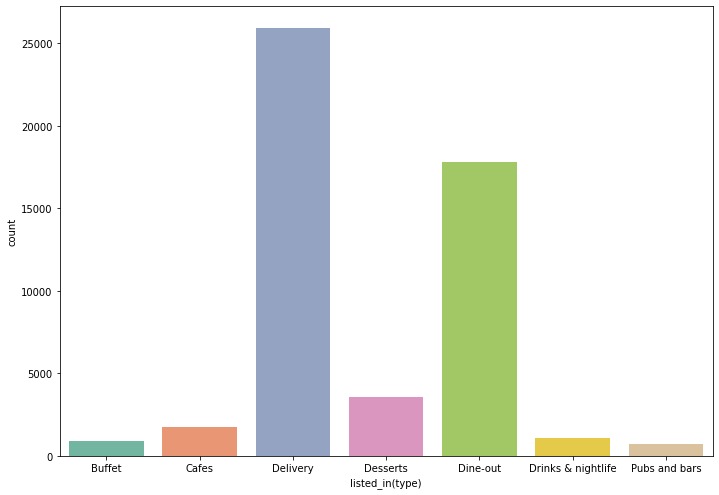

In [ ]:
#countplot
rcParams['figure.figsize'] = 11.7,8.27
sns.countplot(x='listed_in(type)',data=df,palette="Set2")



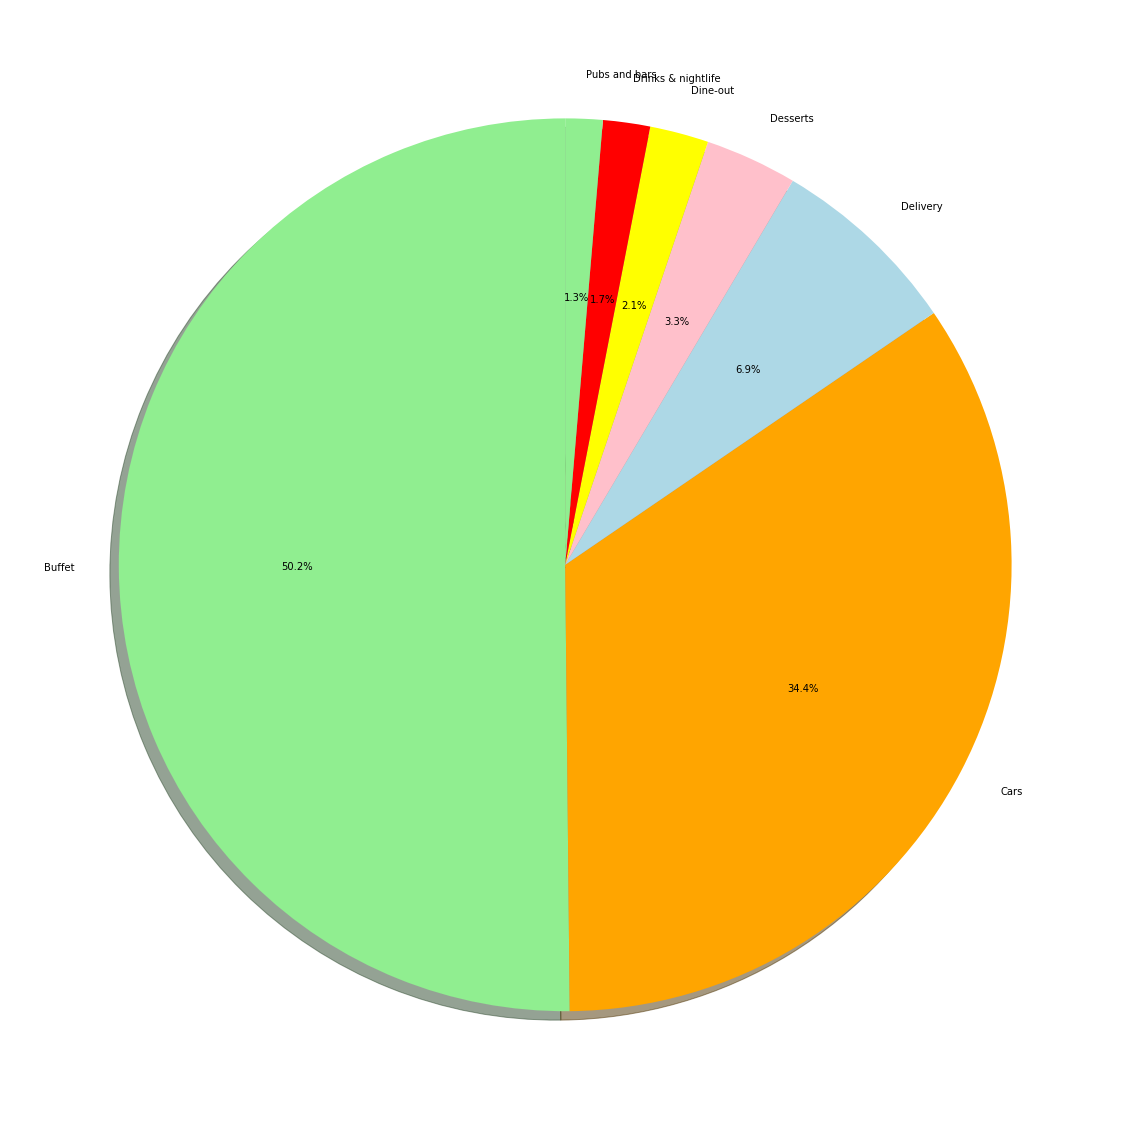

In [ ]:
labels = ['Buffet','Cars','Delivery','Desserts','Dine-out','Drinks & nightlife','Pubs and bars']
colors = ['lightgreen','orange','lightblue','pink','yellow','red']
values = df['listed_in(type)'].value_counts()
fig = plt.figure(figsize=(20,30))
pie(values,labels=labels,colors=colors,autopct="%1.1f%%",startangle=90,shadow=True)
show()

# Top 5 famous locations

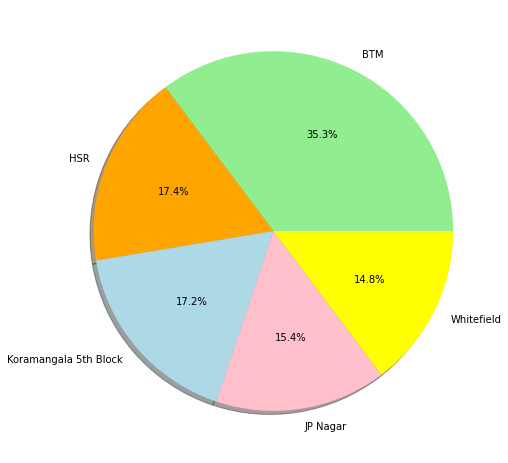

In [ ]:
a= list(df['location'].value_counts())
a = a[:5]

b = ['BTM','HSR','Koramangala 5th Block','JP Nagar','Whitefield']
colors = ['lightgreen','orange','lightblue','pink','yellow','red']
pie(a,labels=b,colors=colors,autopct="%1.1f%%",startangle=0,shadow=True)
show()


### Availability of online service

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


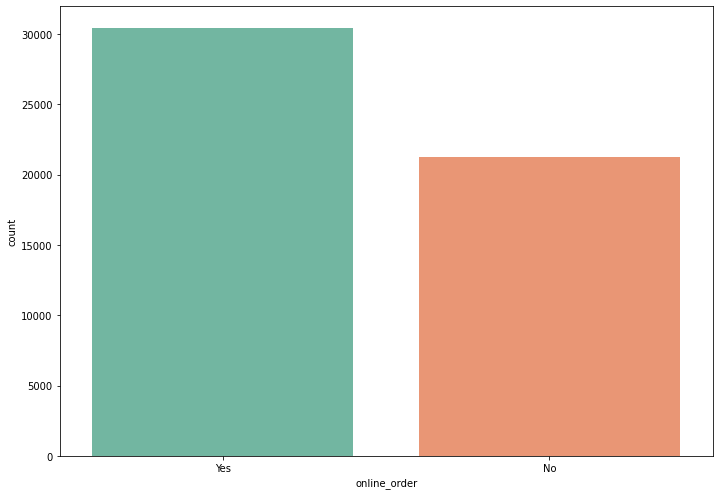

In [ ]:
sns.countplot(df['online_order'],data=df,palette="Set2")
show()

(-1.1005080146575468,
 1.1106683078084834,
 -1.113079781578525,
 1.1228166255261147)

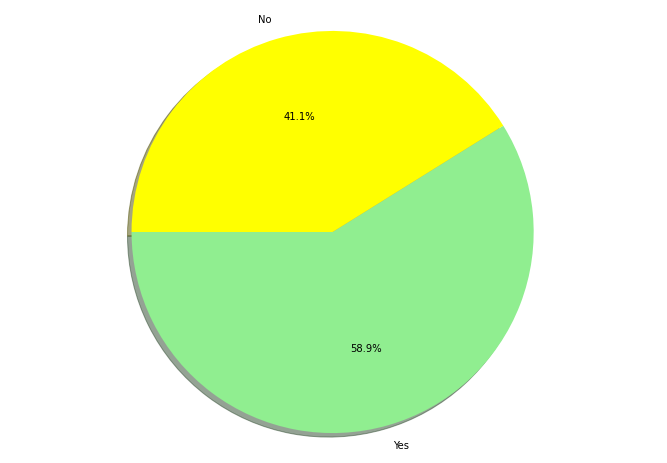

In [ ]:
#the same in pie chart denoting percentage
labels = ['Yes','No']
values = df['online_order'].value_counts()
colors = ['LightGreen','yellow']
pie(values,labels=labels,colors=colors,shadow=True,startangle=180,autopct="%1.1f%%")
axis('equal')

### Availability of table booking service 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


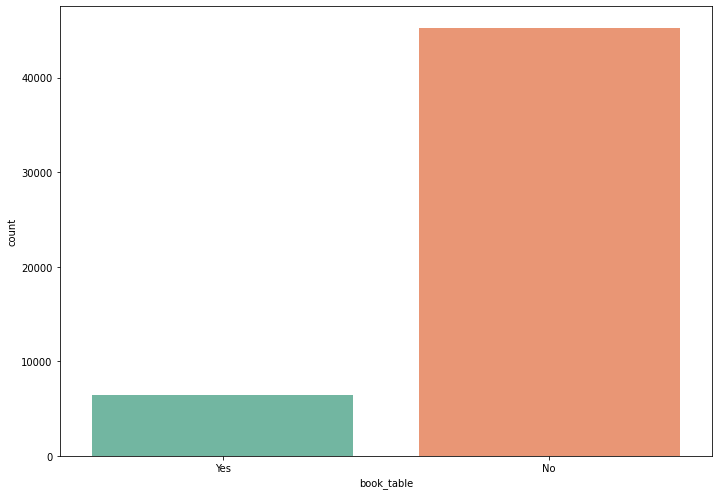

In [ ]:
sns.countplot(df['book_table'],data=df,palette = "Set2")
show()

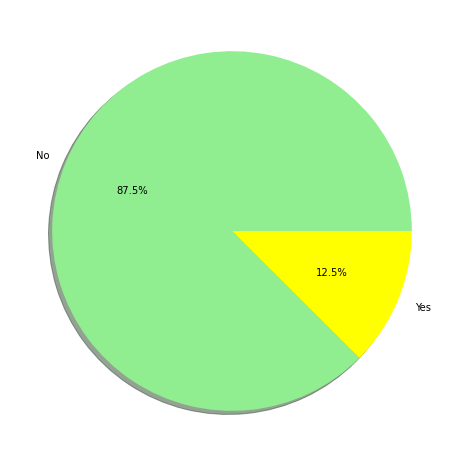

In [ ]:
#the same in piechart denoting percentage
labels = ['No','Yes']
values = df['book_table'].value_counts()
colors = ['LightGreen','yellow']
pie(values,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True)
show()